# Lab1-Assignment-Group52
## Agostino Sorbo, Anique Lodewijkx, Elizabeth Dwenger, Selma Dissing

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

This notebook describes the assignment for Lab 1 of the text mining course. 

**Points**: each exercise is prefixed with the number of points you can obtain for the exercise.

We assume you have worked through the following notebooks:
* **Lab1.1-introduction**
* **Lab1.2-introduction-to-NLTK**
* **Lab1.3-introduction-to-spaCy** 

In this assignment, you will process an English text (**Lab1-apple-samsung-example.txt**) with both NLTK and spaCy and discuss the similarities and differences.

## Credits
The notebooks in this block have been originally created by [Marten Postma](https://martenpostma.github.io). Adaptations were made by [Filip Ilievski](http://ilievski.nl).

## Tip: how to read a file from disk
Let's open the file **Lab1-apple-samsung-example.txt** from disk.

In [1]:
from pathlib import Path

In [2]:
cur_dir = Path().resolve() # this should provide you with the folder in which this notebook is placed
path_to_file = Path.joinpath(cur_dir, 'Lab1-apple-samsung-example.txt')
print(path_to_file)
print('does path exist? ->', Path.exists(path_to_file))

/Users/selmadissing/Documents/2. BSc Artificial Intelligence/Year 3/P4/Text Mining/ba-text-mining-2023-group52/lab_sessions/lab1/Lab1-apple-samsung-example.txt
does path exist? -> True


If the output from the code cell above states that **does path exist? -> False**, please check that the file **Lab1-apple-samsung-example.txt** is in the same directory as this notebook.

In [3]:
with open(path_to_file) as infile:
    text = infile.read()

print('number of characters', len(text))

number of characters 1139


## [total points: 4] Exercise 1: NLTK
In this exercise, we use NLTK to apply **Part-of-speech (POS) tagging**, **Named Entity Recognition (NER)**, and **Constituency parsing**. The following code snippet already performs sentence splitting and tokenization. 

In [4]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize

In [5]:
sentences_nltk = sent_tokenize(text)

In [6]:
tokens_per_sentence = []
for sentence_nltk in sentences_nltk:
    sent_tokens = word_tokenize(sentence_nltk)
    tokens_per_sentence.append(sent_tokens)

We will use lists to keep track of the output of the NLP tasks. We can hence inspect the output for each task using the index of the sentence.

In [7]:
sent_id = 2
print('SENTENCE', sentences_nltk[sent_id])
print('TOKENS', tokens_per_sentence[sent_id])

SENTENCE Apple stated it had “acted quickly and diligently" in order to "determine that these newly released products do infringe many of the same claims already asserted by Apple."
TOKENS ['Apple', 'stated', 'it', 'had', '“', 'acted', 'quickly', 'and', 'diligently', "''", 'in', 'order', 'to', '``', 'determine', 'that', 'these', 'newly', 'released', 'products', 'do', 'infringe', 'many', 'of', 'the', 'same', 'claims', 'already', 'asserted', 'by', 'Apple', '.', "''"]


### [point: 1] Exercise 1a: Part-of-speech (POS) tagging
Use `nltk.pos_tag` to perform part-of-speech tagging on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [8]:
pos_tags_per_sentence = []
for tokens in tokens_per_sentence:
    tagged_token = nltk.pos_tag(tokens)
    pos_tags_per_sentence.append(tagged_token)

In [9]:
print(pos_tags_per_sentence)

[[('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('San', 'NNP'), ('Jose', 'NNP'), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), ('California', 'NNP'), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')], [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'), ('tablets', 'NNS'), ('affected', 'VBN'), ('are', 'VBP'), ('the', 'DT'), ('Galaxy', 'NNP'), ('S', 'NNP'), ('III', 'NN

### [point: 1] Exercise 1b: Named Entity Recognition (NER)
Use `nltk.chunk.ne_chunk` to perform Named Entity Recognition (NER) on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [10]:
ner_tags_per_sentence = []
for sent in pos_tags_per_sentence:
    sent_named = nltk.chunk.ne_chunk(sent)
    ner_tags_per_sentence.append(sent_named)
print(ner_tags_per_sentence[0])

(S
  https/NN
  :/:
  //www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html/JJ
  Documents/NNS
  filed/VBN
  to/TO
  the/DT
  (ORGANIZATION San/NNP Jose/NNP)
  federal/JJ
  court/NN
  in/IN
  (GPE California/NNP)
  on/IN
  November/NNP
  23/CD
  list/NN
  six/CD
  (ORGANIZATION Samsung/NNP)
  products/NNS
  running/VBG
  the/DT
  ``/``
  Jelly/RB
  (GPE Bean/NNP)
  ''/''
  and/CC
  ``/``
  Ice/NNP
  Cream/NNP
  Sandwich/NNP
  ''/''
  operating/VBG
  systems/NNS
  ,/,
  which/WDT
  (PERSON Apple/NNP)
  claims/VBZ
  infringe/VB
  its/PRP$
  patents/NNS
  ./.)


In [11]:
print(ner_tags_per_sentence)

[Tree('S', [('https', 'NN'), (':', ':'), ('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ'), ('Documents', 'NNS'), ('filed', 'VBN'), ('to', 'TO'), ('the', 'DT'), Tree('ORGANIZATION', [('San', 'NNP'), ('Jose', 'NNP')]), ('federal', 'JJ'), ('court', 'NN'), ('in', 'IN'), Tree('GPE', [('California', 'NNP')]), ('on', 'IN'), ('November', 'NNP'), ('23', 'CD'), ('list', 'NN'), ('six', 'CD'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('products', 'NNS'), ('running', 'VBG'), ('the', 'DT'), ('``', '``'), ('Jelly', 'RB'), Tree('GPE', [('Bean', 'NNP')]), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), ('operating', 'VBG'), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), Tree('PERSON', [('Apple', 'NNP')]), ('claims', 'VBZ'), ('infringe', 'VB'), ('its', 'PRP$'), ('patents', 'NNS'), ('.', '.')]), Tree('S', [('The', 'DT'), ('six', 'CD'), ('phones', 'NNS'), ('and', 'CC'),

### [points: 2] Exercise 1c: Constituency parsing
Use the `nltk.RegexpParser` to perform constituency parsing on each sentence.

Use `print` to **show** the output in the notebook (and hence also in the exported PDF!).

In [12]:
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*''')

In [13]:
constituency_output_per_sentence = []
for sent in pos_tags_per_sentence:
    parsed_sent = constituent_parser.parse(sent)
    constituency_output_per_sentence.append(parsed_sent)

In [14]:
print(constituency_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), ('San', 'NNP'), ('Jose', 'NNP'), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), ('California', 'NNP'), Tree('P', [('on', 'IN')]), ('November', 'NNP'), ('23', 'CD'), Tree('NP', [('list', 'NN')]), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), ('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP'), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), Tree('VP', [Tree('V', [('claims', 'VBZ')])]), Tree('VP', [Tree('V', [

Augment the RegexpParser so that it also detects Named Entity Phrases (NEP), e.g., that it detects *Galaxy S III* and *Ice Cream Sandwich*

In [15]:
constituent_parser_v2 = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*
NEP: {<NNP><NNP><NNP>}  # NEP -> NNP, NNP, NNP ''')

In [16]:
constituency_v2_output_per_sentence = []
for sent in pos_tags_per_sentence:
    sent = constituent_parser_v2.parse(sent)
    constituency_v2_output_per_sentence.append(sent)

In [17]:
print(constituency_v2_output_per_sentence)

[Tree('S', [Tree('NP', [('https', 'NN')]), (':', ':'), Tree('NP', [('//www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html', 'JJ')]), ('Documents', 'NNS'), Tree('VP', [Tree('V', [('filed', 'VBN')])]), ('to', 'TO'), Tree('NP', [('the', 'DT')]), ('San', 'NNP'), ('Jose', 'NNP'), Tree('NP', [('federal', 'JJ'), ('court', 'NN')]), Tree('P', [('in', 'IN')]), ('California', 'NNP'), Tree('P', [('on', 'IN')]), ('November', 'NNP'), ('23', 'CD'), Tree('NP', [('list', 'NN')]), ('six', 'CD'), ('Samsung', 'NNP'), ('products', 'NNS'), Tree('VP', [Tree('V', [('running', 'VBG')]), Tree('NP', [('the', 'DT')])]), ('``', '``'), ('Jelly', 'RB'), ('Bean', 'NNP'), ("''", "''"), ('and', 'CC'), ('``', '``'), Tree('NEP', [('Ice', 'NNP'), ('Cream', 'NNP'), ('Sandwich', 'NNP')]), ("''", "''"), Tree('VP', [Tree('V', [('operating', 'VBG')])]), ('systems', 'NNS'), (',', ','), ('which', 'WDT'), ('Apple', 'NNP'), Tree('VP', [Tree('V', [('claims', 'VBZ')])]), Tree('VP

## [total points: 1] Exercise 2: spaCy
Use Spacy to process the same text as you analyzed with NLTK.

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [19]:
doc = nlp(text)
sents_cy = list(doc.sents)
pos_tags_per_sentence_cy = [[(tok.text, tok.tag_) for tok in sent] for sent in sents_cy]
pos_tags_per_sentence_cy[0]

[('https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html',
  'NNS'),
 ('\n\n', '_SP'),
 ('Documents', 'NNS'),
 ('filed', 'VBD'),
 ('to', 'IN'),
 ('the', 'DT'),
 ('San', 'NNP'),
 ('Jose', 'NNP'),
 ('federal', 'JJ'),
 ('court', 'NN'),
 ('in', 'IN'),
 ('California', 'NNP'),
 ('on', 'IN'),
 ('November', 'NNP'),
 ('23', 'CD'),
 ('list', 'NN'),
 ('six', 'CD'),
 ('Samsung', 'NNP'),
 ('products', 'NNS'),
 ('running', 'VBG'),
 ('the', 'DT'),
 ('"', '``'),
 ('Jelly', 'NNP'),
 ('Bean', 'NNP'),
 ('"', "''"),
 ('and', 'CC'),
 ('"', '``'),
 ('Ice', 'NNP'),
 ('Cream', 'NNP'),
 ('Sandwich', 'NN'),
 ('"', "''"),
 ('operating', 'NN'),
 ('systems', 'NNS'),
 (',', ','),
 ('which', 'WDT'),
 ('Apple', 'NNP'),
 ('claims', 'VBZ'),
 ('infringe', 'VBP'),
 ('its', 'PRP$'),
 ('patents', 'NNS'),
 ('.', '.'),
 ('\n', '_SP')]

In [20]:
from spacy import displacy
displacy.render(sents_cy[3:6], jupyter=True, style='ent')

In [31]:
for ent in doc.ents:
    print(ent.text, ent.label_)

https://www.telegraph.co.uk/technology/apple/9702716/Apple-Samsung-lawsuit-six-more-products-under-scrutiny.html TIME
San Jose GPE
California GPE
November 23 DATE
six CARDINAL
Samsung ORG
the "Jelly Bean LAW
Apple ORG
six CARDINAL
the Galaxy S III ORG
Jelly Bean ORG
8.9 CARDINAL
2 10.1 DATE
Galaxy Rugby Pro ORG
Galaxy S III PERSON
Apple ORG
Apple ORG
August DATE
Samsung ORG
US GPE
Apple ORG
1.05bn MONEY
0.66bn MONEY
iPad ORG
Galaxy FAC
Samsung ORG
UK GPE
Samsung ORG
Apple ORG
South Korean NORP
iPad ORG


small tip: You can use **sents = list(doc.sents)** to be able to use the index to access a sentence like **sents[2]** for the third sentence.


## [total points: 7] Exercise 3: Comparison NLTK and spaCy
We will now compare the output of NLTK and spaCy, i.e., in what do they differ?

### [points: 3] Exercise 3a: Part of speech tagging
Compare the output from NLTK and spaCy regarding part of speech tagging.

* #### To compare, you probably would like to compare sentence per sentence. Describe if the sentence splitting is different for NLTK than for spaCy. If not, where do they differ?

In [29]:
if len(sents_cy) == len(sentences_nltk):
    for i, (a, b) in enumerate(zip(sentences_nltk, sents_cy)):
        if a != b.text.strip():
            print("Sentence ", i, ":")
            print("NLTK: ", sentences_nltk[i])
            print("SpaCy: ", sents_cy[i], "\n")

Sentence  2 :
NLTK:  Apple stated it had “acted quickly and diligently" in order to "determine that these newly released products do infringe many of the same claims already asserted by Apple."
SpaCy:  Apple stated it had “acted quickly and diligently" in order to "determine that these newly released products do infringe many of the same claims already asserted by Apple. 

Sentence  3 :
NLTK:  In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices.
SpaCy:  "
In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices. 



>The sentence parsing appears to be very similar for both that done by nltk and spaCy. Differences can be seen with the trailing whitespace left occasionally in the output of spaCy, as well as the tendency of nltk to keep quotation marks if it appears at the end of a sentence. 

* #### After checking the sentence splitting, select a sentence for which you expect interesting results and perhaps differences. Motivate your choice.
* #### Compare the output in `token.tag` from spaCy to the part of speech tagging from NLTK for each token in your selected sentence. Are there any differences? This is not a trick question; it is possible that there are no differences.

>For this task we chose to compare the speech tagging for the last sentence for its difficulty; it contains multiple different geopolitical objects and names of companies.

>This section contains part-of-speech and named entity recognition

In [49]:
sentence = 5

pos_tokens = nltk.pos_tag(tokens_per_sentence[sentence])
#print(named_entities_nltk)
 
tags_spaCy = []
for token in sents_cy[sentence]:
    tags_spaCy.append((token, token.tag_))

for i in range(len(named_entities_nltk)):
    print("NLTK: ", pos_tokens[i], "\t\tspaCy: (", tags_spaCy[i][0], ",", tags_spaCy[i][1],")")

NLTK:  ('A', 'DT') 		 spaCy: ( A , DT )
NLTK:  ('similar', 'JJ') 		 spaCy: ( similar , JJ )
NLTK:  ('case', 'NN') 		 spaCy: ( case , NN )
NLTK:  ('in', 'IN') 		 spaCy: ( in , IN )
NLTK:  ('the', 'DT') 		 spaCy: ( the , DT )
NLTK:  ('UK', 'NNP') 		 spaCy: ( UK , NNP )
NLTK:  ('found', 'VBD') 		 spaCy: ( found , VBN )
NLTK:  ('in', 'IN') 		 spaCy: ( in , IN )
NLTK:  ('Samsung', 'NNP') 		 spaCy: ( Samsung , NNP )
NLTK:  ("'s", 'POS') 		 spaCy: ( 's , POS )
NLTK:  ('favour', 'NN') 		 spaCy: ( favour , NN )
NLTK:  ('and', 'CC') 		 spaCy: ( and , CC )
NLTK:  ('ordered', 'VBD') 		 spaCy: ( ordered , VBD )
NLTK:  ('Apple', 'NNP') 		 spaCy: ( Apple , NNP )
NLTK:  ('to', 'TO') 		 spaCy: ( to , TO )
NLTK:  ('publish', 'VB') 		 spaCy: ( publish , VB )
NLTK:  ('an', 'DT') 		 spaCy: ( an , DT )
NLTK:  ('apology', 'NN') 		 spaCy: ( apology , NN )
NLTK:  ('making', 'VBG') 		 spaCy: ( making , VBG )
NLTK:  ('clear', 'JJ') 		 spaCy: ( clear , JJ )
NLTK:  ('that', 'IN') 		 spaCy: ( that , IN )
NLTK:  ('t

>When comparing nltk and spaCy, the first difference is that nltk identifies 'iPad' as NN (noun) while spacy identifies it as NNP (proper noun).
>Secondly, nltk identifies 'found' as a VBD (past tense) while spacy identifies it as VBN (past participle).

### [points: 2] Exercise 3b: Named Entity Recognition (NER)


In [86]:
sentence = 5

pos_tokens = nltk.pos_tag(tokens_per_sentence[sentence])
named_entities_nltk = nltk.chunk.ne_chunk(pos_tokens)
#print(named_entities_nltk)
 
named_entities_spaCy = []
for ent in sents_cy[sentence].ents:
    named_entities_spaCy.append((ent.text, ent.label_))

for i in range(len(named_entities_nltk)):
    print("NLTK: ", named_entities_nltk[i])

print()

for i in range(len(named_entities_spaCy)):
    print("spaCy: ", named_entities_spaCy[i])


NLTK:  ('A', 'DT')
NLTK:  ('similar', 'JJ')
NLTK:  ('case', 'NN')
NLTK:  ('in', 'IN')
NLTK:  ('the', 'DT')
NLTK:  (ORGANIZATION UK/NNP)
NLTK:  ('found', 'VBD')
NLTK:  ('in', 'IN')
NLTK:  (GPE Samsung/NNP)
NLTK:  ("'s", 'POS')
NLTK:  ('favour', 'NN')
NLTK:  ('and', 'CC')
NLTK:  ('ordered', 'VBD')
NLTK:  (PERSON Apple/NNP)
NLTK:  ('to', 'TO')
NLTK:  ('publish', 'VB')
NLTK:  ('an', 'DT')
NLTK:  ('apology', 'NN')
NLTK:  ('making', 'VBG')
NLTK:  ('clear', 'JJ')
NLTK:  ('that', 'IN')
NLTK:  ('the', 'DT')
NLTK:  (LOCATION South/JJ Korean/JJ)
NLTK:  ('firm', 'NN')
NLTK:  ('had', 'VBD')
NLTK:  ('not', 'RB')
NLTK:  ('copied', 'VBN')
NLTK:  ('its', 'PRP$')
NLTK:  ('iPad', 'NN')
NLTK:  ('when', 'WRB')
NLTK:  ('designing', 'VBG')
NLTK:  ('its', 'PRP$')
NLTK:  ('own', 'JJ')
NLTK:  ('devices', 'NNS')
NLTK:  ('.', '.')

spaCy:  ('UK', 'GPE')
spaCy:  ('Samsung', 'ORG')
spaCy:  ('Apple', 'ORG')
spaCy:  ('South Korean', 'NORP')
spaCy:  ('iPad', 'ORG')


>Named Entity recognition is shown in the output above. 
>The output of NLTK classifies 'UK' as a organisation, whereas spaCy classifies it as a geopolitical entity (which is correct). NLTK correctly identifies 'iPad; as a proper noun whereas spaCy identifies it as a company. NLTK identifies 'Apple' as a person whereas spaCy identifies it as a company. NLTK identifies 'Samsung' as a geopolitical entity whereas spaCy identifies it as a company. NLTK identifies 'South Korean' as a location (which is incorrect) whereas spaCy identifies it as a nationality.

>The number of named entities identified by spaCy is more accurate (with only one wrong for sentence 5) and exceeds the number identified by NLTK. While spaCy's classification is superior, it is still imperfect.

### [points: 2] Exercise 3c: Constituency/dependency parsing
Choose one sentence from the text and run constituency parsing using NLTK and dependency parsing using spaCy.
* #### Describe briefly the difference between constituency parsing and dependency parsing

>In constituency parsing the position of words in the sentence is ignored and only the structural role of words is considered. This kind of parsing puts words into groups when they are at the same hierachical level.
>In dependency parsing, the relationship between words is the focus; these parsers decide which words are dependent on which others depending on the context of the sentence and its semantics.

In [55]:
#Dependency parsing
displacy.render(sents_cy[sentence], jupyter=True, style='dep')

In [64]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


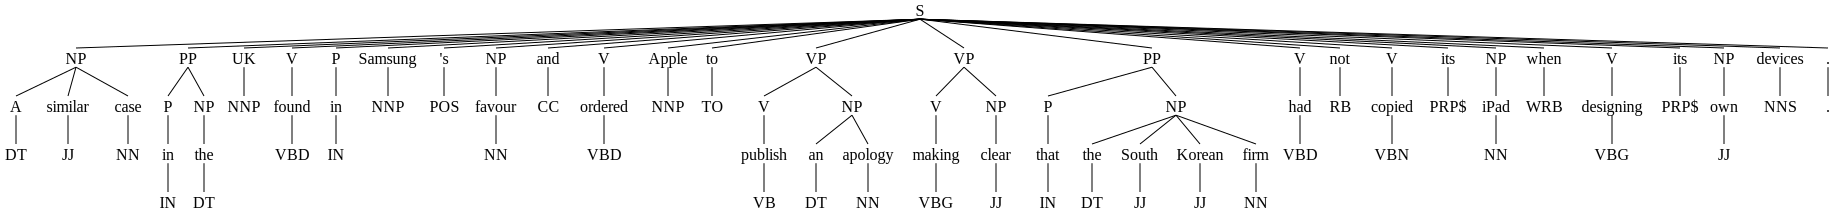

In [67]:
#Constituency parsing
#import draw_tree
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>}  # VP -> V (NP|PP)''')

pos_tokens = nltk.pos_tag(tokens_per_sentence[sentence])
constituent_parser.parse(pos_tokens)

* #### Describe differences between the output from NLTK and spaCy.

>NLTK builds a tree and only describes what each word is - constituency parsing. spaCy does that but also describes relations within the words in the sentence - dependency parsing.

# End of this notebook